## Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [2]:
# Memuat dataset
file_path = 'Labeled_Data.csv'
data = pd.read_csv(file_path, delimiter='|')
data

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1.545404e+09,CrDn63WjJEmrWGjqf,192.168.1.195,41040,185.244.25.235,80,tcp,-,3.139211,0,...,-,0,S,3,180,0,0,-,Benign,-
1,1.545404e+09,CY9lJW3gh1Eje4usP6,192.168.1.195,41040,185.244.25.235,80,tcp,-,-,-,...,-,0,S,1,60,0,0,-,Benign,-
2,1.545404e+09,CcFXLynukEDnUlvgl,192.168.1.195,41040,185.244.25.235,80,tcp,-,-,-,...,-,0,S,1,60,0,0,-,Benign,-
3,1.545404e+09,CDrkrSobGYxHhYfth,192.168.1.195,41040,185.244.25.235,80,tcp,http,1.477656,149,...,-,2896,ShADadttcfF,94,5525,96,139044,-,Benign,-
4,1.545404e+09,CTWZQf2oJSvq6zmPAc,192.168.1.195,41042,185.244.25.235,80,tcp,-,3.147116,0,...,-,0,S,3,180,0,0,-,Benign,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,1.545459e+09,CtHdqV2bRN9hLkIDbj,192.168.1.195,53746,185.244.25.235,6667,tcp,-,-,-,...,-,0,S,1,60,0,0,-,Malicious C&C,NaN
5496,1.545459e+09,CuPvakyHb85s6KeEl,192.168.1.195,53752,185.244.25.235,6667,tcp,-,3.139454,0,...,-,0,S,3,180,0,0,-,Malicious C&C,NaN
5497,1.545459e+09,CwC1Ct45DINhlZxNWi,192.168.1.195,123,147.231.100.5,123,udp,-,-,-,...,-,0,D,1,76,0,0,-,Benign,-
5498,1.545459e+09,CxI9Bn3ZesEzSnA6G7,192.168.1.195,53752,185.244.25.235,6667,tcp,-,-,-,...,-,0,S,1,60,0,0,-,Malicious C&C,NaN


## Pra-Pemrosesan

In [3]:
# Mengatasi nilai yang hilang: yang berarti nilai yang hilang akan diisi dengan nilai terakhir yang tidak hilang sebelumnya 
data.fillna(method='ffill', inplace=True)

C:\Users\marip\AppData\Local\Temp\ipykernel_11668\747271962.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [4]:
# Mengonversi kolom 'ts' ke tipe numerik, Ceorce = mengisi Nan
data['ts'] = pd.to_numeric(data['ts'], errors='coerce')
data['ts']

0       1.545404e+09
1       1.545404e+09
2       1.545404e+09
3       1.545404e+09
4       1.545404e+09
            ...     
5495    1.545459e+09
5496    1.545459e+09
5497    1.545459e+09
5498    1.545459e+09
5499    1.545459e+09
Name: ts, Length: 5500, dtype: float64

In [5]:
# Menghapus kolom yang tidak relevan
data.drop(columns=['uid', 'id.orig_h', 'id.resp_h', 'service', 'detailed-label'], inplace=True)

In [6]:
# Menggabungkan semua nilai 'Malicious' menjadi satu kategori
data['label'] = data['label'].apply(lambda x: 'Malicious' if 'Malicious' in x else x)
data['label']

0          Benign
1          Benign
2          Benign
3          Benign
4          Benign
          ...    
5495    Malicious
5496    Malicious
5497       Benign
5498    Malicious
5499    Malicious
Name: label, Length: 5500, dtype: object

In [7]:
# Encoding fitur kategorikal (one-hot encoding) : akan menghapus kolom primary menjadi sub kolom
data = pd.get_dummies(data, columns=['proto', 'history'])

In [8]:
# Mengonversi kolom dengan tanda '-' menjadi numerik dengan nilai nol
data.replace('-', 0, inplace=True)

C:\Users\marip\AppData\Local\Temp\ipykernel_11668\234326197.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace('-', 0, inplace=True)


In [9]:
# Mengonversi kolom lainnya ke tipe numerik
for col in ['duration', 'orig_bytes', 'resp_bytes', 'conn_state']:
    data[col] = pd.to_numeric(data[col], errors='coerce').fillna(0)

In [10]:
# Encoding kolom label, akan di label kemudian tetapkan dan diubah
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])
data['label'] 

0       0
1       0
2       0
3       0
4       0
       ..
5495    1
5496    1
5497    0
5498    1
5499    1
Name: label, Length: 5500, dtype: int32

In [11]:
# Memeriksa kembali apakah ada kolom yang masih memiliki tipe data object
for col in data.columns:
    if data[col].dtype == 'object':
        print(f"Kolom {col} masih memiliki tipe data object dan berisi nilai: {data[col].unique()}")

In [12]:
# Normalisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(columns=['label']))
data_scaled

array([[-1.00841862,  0.14286124, -0.64581143, ..., -0.09383021,
        -0.01907272, -0.01348522],
       [-1.00794243,  0.14286124, -0.64581143, ..., -0.09383021,
        -0.01907272, -0.01348522],
       [-1.00740417,  0.14286124, -0.64581143, ..., -0.09383021,
        -0.01907272, -0.01348522],
       ...,
       [ 2.65331057, -1.6886327 , -0.64111919, ..., -0.09383021,
        -0.01907272, -0.01348522],
       [ 2.65734761,  0.71186559,  0.07297458, ..., -0.09383021,
        -0.01907272, -0.01348522],
       [ 2.6363558 ,  0.70846374,  0.07297458, ..., -0.09383021,
        -0.01907272, -0.01348522]])

## Membagi Data

In [13]:
# Membagi data menjadi data pelatihan dan data pengujian
X = data_scaled
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Latih Data

In [14]:
# Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [15]:
# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [16]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Confusion Matrix & hasil data latih

In [18]:
# Prediksi dan Confusion Matrix
y_pred_nb = nb_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

cm_nb = confusion_matrix(y_test, y_pred_nb)
cr_nb = classification_report(y_test, y_pred_nb, digits=4)

cm_svm = confusion_matrix(y_test, y_pred_svm)
cr_svm = classification_report(y_test, y_pred_svm, digits=4)

cm_lr = confusion_matrix(y_test, y_pred_lr)
cr_lr = classification_report(y_test, y_pred_lr, digits=4)

In [19]:
# print("\nNaïve Bayes Confusion Matrix:")
# print(cm_nb)
print("Naïve Bayes Classification Report:")
print(cr_nb)

Naïve Bayes Classification Report:
              precision    recall  f1-score   support

           0     0.9938    0.9464    0.9695       336
           1     0.9769    0.9974    0.9870       764

    accuracy                         0.9818      1100
   macro avg     0.9853    0.9719    0.9783      1100
weighted avg     0.9821    0.9818    0.9817      1100



In [20]:
# print("\nSVM Confusion Matrix:")
# print(cm_svm)
print("SVM Classification Report:")
print(cr_svm)

SVM Classification Report:
              precision    recall  f1-score   support

           0     0.9970    1.0000    0.9985       336
           1     1.0000    0.9987    0.9993       764

    accuracy                         0.9991      1100
   macro avg     0.9985    0.9993    0.9989      1100
weighted avg     0.9991    0.9991    0.9991      1100



In [21]:
# print("\nLogistic Regression Confusion Matrix:")
# print(cm_lr)
print("Logistic Regression Classification Report:")
print(cr_lr)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0     0.9970    1.0000    0.9985       336
           1     1.0000    0.9987    0.9993       764

    accuracy                         0.9991      1100
   macro avg     0.9985    0.9993    0.9989      1100
weighted avg     0.9991    0.9991    0.9991      1100



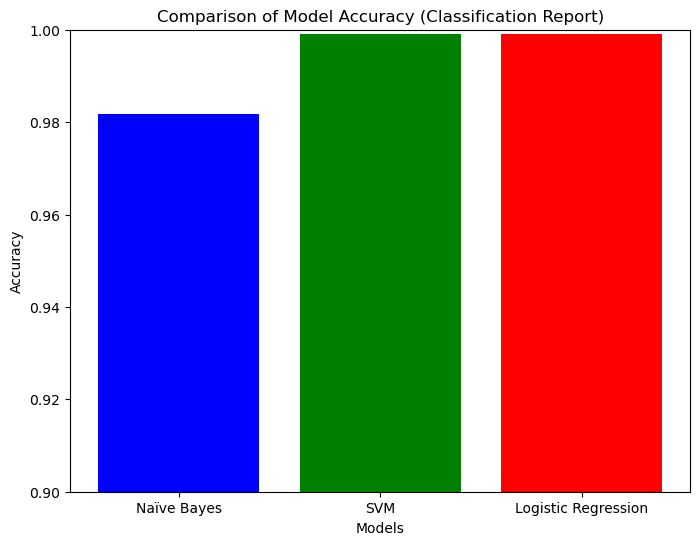

In [22]:
# visualisasi perbandingan nilai latih 3 model
accuracy_nb = cm_nb.trace() / cm_nb.sum()
accuracy_svm = cm_svm.trace() / cm_svm.sum()
accuracy_lr = cm_lr.trace() / cm_lr.sum()

# Plot bar graph for classification report accuracies
plt.figure(figsize=(8, 6))
bar_labels = ['Naïve Bayes', 'SVM', 'Logistic Regression']
accuracies = [accuracy_nb, accuracy_svm, accuracy_lr]
colors = ['blue', 'green', 'red']

plt.bar(bar_labels, accuracies, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy (Classification Report)')
plt.ylim(0.9, 1)  # Adjust based on actual scores
plt.show()

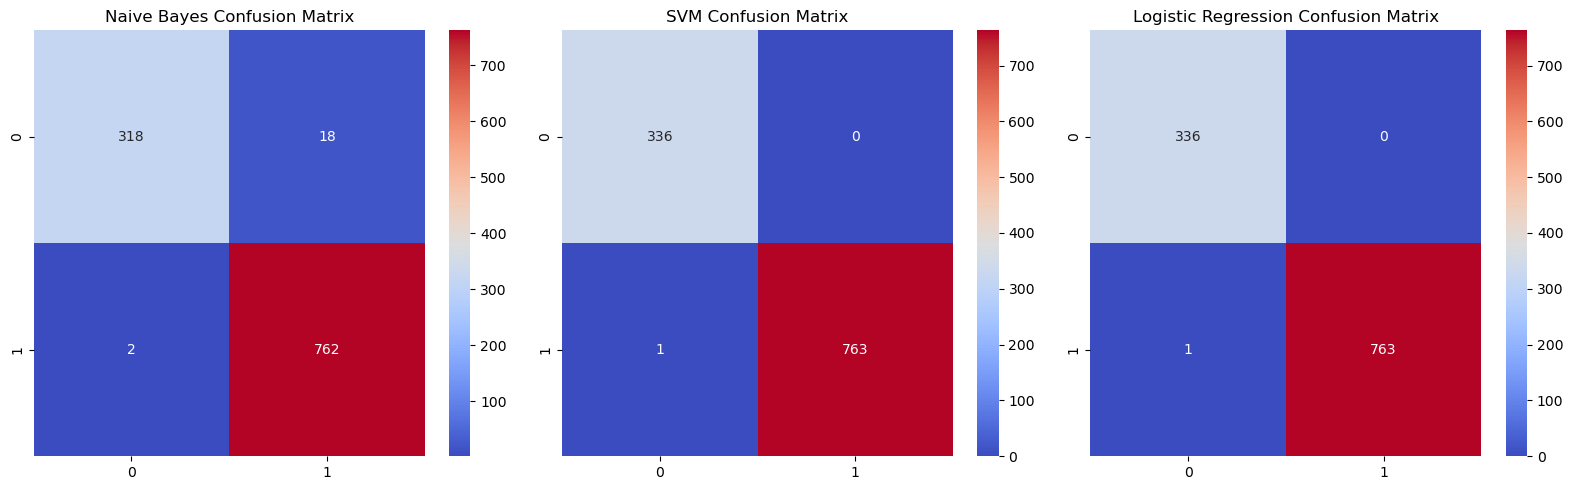

In [23]:
# Plotting
plt.figure(figsize=(16, 5))

# Plot Confusion Matrix
plt.subplot(1, 3, 1)
sns.heatmap(cm_nb, annot=True, fmt='g', cmap='coolwarm')
plt.title('Naive Bayes Confusion Matrix')

plt.subplot(1, 3, 2)
sns.heatmap(cm_svm, annot=True, fmt='g', cmap='coolwarm')
plt.title('SVM Confusion Matrix')

plt.subplot(1, 3, 3)
sns.heatmap(cm_lr, annot=True, fmt='g', cmap='coolwarm')
plt.title('Logistic Regression Confusion Matrix')

plt.tight_layout()
plt.show()


## Cross Validation

In [24]:
# Inisialisasi model Naïve Bayes
nb_model = GaussianNB()

# Cross-validation untuk Naïve Bayes
scores_nb = cross_val_score(nb_model, X, y, cv=10)
average_score_nb = round(scores_nb.mean(), 4)

print("Naïve Bayes CV :", average_score_nb)

Naïve Bayes CV : 0.9891


In [25]:
# Inisialisasi model SVM
svm_model = SVC(kernel='linear')

# Cross-validation untuk SVM
scores_svm = cross_val_score(svm_model, X, y, cv=10)
average_score_svm = round(scores_svm.mean(), 4)

print("SVM CV :", average_score_svm)


SVM CV : 0.9998


In [26]:
# Inisialisasi model Logistic Regression
lr_model = LogisticRegression(max_iter=1000)

# Cross-validation untuk Logistic Regression
scores_lr = cross_val_score(lr_model, X, y, cv=10)
average_score_lr = round(scores_lr.mean(), 4)

print("Logistic Regression CV :", average_score_lr)

Logistic Regression CV : 0.9807


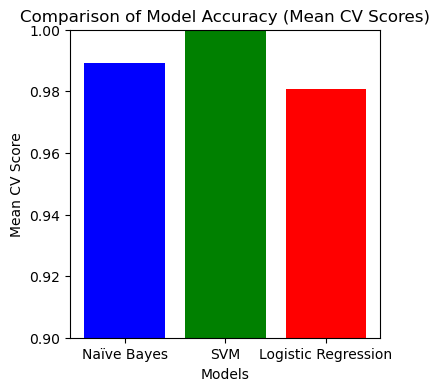

In [27]:
# Plot bar graph for model comparison
plt.figure(figsize=(4, 4))
bar_labels = ['Naïve Bayes', 'SVM', 'Logistic Regression']
scores_mean = [average_score_nb, average_score_svm, average_score_lr]
colors = ['blue', 'green', 'red']

plt.bar(bar_labels, scores_mean, color=colors)
plt.xlabel('Models')
plt.ylabel('Mean CV Score')
plt.title('Comparison of Model Accuracy (Mean CV Scores)')
plt.ylim(0.9, 1)  # Assuming the scores range somewhat high; adjust based on actual scores
plt.show()